In [109]:
!pip install openpyxl

In [110]:
import pandas as pd
data = pd.read_excel(r'C:\Users\daves\AppData\Roaming\JetBrains\DataSpell2021.3\projects\biz_analytics_a_starter\data\external\Dry_Bean_Dataset.xlsx', engine='openpyxl')

In [111]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [112]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [113]:
#Pandas immer Zeilen,Spalten
data['Class'] = data['Class'] == 'BARBUNYA'

In [114]:
data['Class'].value_counts()
# Klassen haben unterschiedliche Größen - imbalanced Problem bspw. bei Betrug vorhersagen

False    12289
True      1322
Name: Class, dtype: int64

In [115]:
cols_to_keep = [7,12,13,14,16]
#Nehme nur von data alle zeilen und diese Spalten
data = data.iloc[:,cols_to_keep]
data

,EquivDiameter,ShapeFactor1,ShapeFactor2,ShapeFactor3,Class
0,190.141097,0.007332,0.003147,0.834222,False
1,191.272750,0.006979,0.003564,0.909851,False
2,193.410904,0.007244,0.003048,0.825871,False
3,195.467062,0.007017,0.003215,0.861794,False
4,195.896503,0.006697,0.003665,0.941900,False
...,...,...,...,...,...
13606,231.515799,0.006858,0.001749,0.642988,False
13607,231.526798,0.006688,0.001886,0.676099,False
13608,231.631261,0.006681,0.001888,0.676884,False
13609,231.653248,0.006724,0.001852,0.668237,False


In [116]:
labels = data['Class']

data = data.drop(columns=['Class'])

In [117]:
labels

0        False
1        False
2        False
3        False
4        False
         ...  
13606    False
13607    False
13608    False
13609    False
13610    False
Name: Class, Length: 13611, dtype: bool

In [118]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data)
X

array([[-1.0633406 ,  0.68078638,  2.40217287,  1.92572347],
       [-1.04421674,  0.3679669 ,  3.10089314,  2.68970162],
       [-1.00808399,  0.60312889,  2.23509147,  1.84135576],
       ...,
       [-0.3621965 ,  0.10426946,  0.28920441,  0.33632829],
       [-0.36182496,  0.14190638,  0.22837538,  0.2489734 ],
       [-0.3612677 ,  0.38751213, -0.12777587, -0.2764814 ]])

In [119]:
y = labels.values
y

array([False, False, False, ..., False, False, False])

In [120]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X,y)

KNeighborsClassifier()

In [121]:
all_predictions = model.predict(X)

In [122]:
prediction_comparison = (all_predictions==labels)
prediction_comparison.value_counts(normalize=True)

True     0.962824
False    0.037176
Name: Class, dtype: float64

# Train-Test-Splitting

In [123]:
# y barbuny oder nicht x daten
#x test vorhersage y test war die vorersage korrekt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

len(X_train)/len(X)

0.7999412240099919

In [124]:
# mach aus y_Train( numpy array ) in eine Panda series damit ich die tollen statistischen Funktionen von Pandas nutzen kann
pd.Series(y_train).value_counts(normalize=True)

False    0.902186
True     0.097814
dtype: float64

Erklärung pd.Series(y_train) numpy array zu pd series

In [125]:
type(y_test)

numpy.ndarray

In [126]:
type(pd.Series(y_test))

pandas.core.series.Series

In [127]:
pd.Series(y_test).value_counts(normalize=True)

False    0.905619
True     0.094381
dtype: float64

# Stratifikation

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [129]:
pd.Series(y_train).value_counts(normalize=True)

False    0.902829
True     0.097171
dtype: float64

In [130]:
pd.Series(y_test).value_counts(normalize=True)

False    0.903048
True     0.096952
dtype: float64

# Übung

# 1)

In [131]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#len(X_test)/len(X)

# 2)

In [132]:
#pd.Series(y_test).value_counts()

# 3)

In [133]:
 #keine_barbunya_bohne = y_test==False

In [134]:
#X_test[keine_barbunya_bohne,:]
#Eckige Klammern könnt ihr Sachen rausfiltern
# Doppelpunkt wir nehmen alle Spalten

In [135]:
#keine_barbunya_bohne

# Modellauswertung
 Confusion Matrix
|true negative | false positive |
|false negative| true positive  |

In [136]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [137]:
y_predicted_test = model.predict(X_test)

In [138]:
y_predicted_test

array([False, False, False, ..., False, False, False])

In [139]:
y_prediction_correct = y_predicted_test==y_test

In [140]:
pd.Series(y_prediction_correct).value_counts()

True     2590
False     133
dtype: int64

In [141]:
predictions_and_labels = pd.DataFrame({
    'prediction_correct': y_prediction_correct,
    'label': y_test})
predictions_and_labels

,prediction_correct,label
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
2718,True,False
2719,True,False
2720,True,False
2721,True,False


In [142]:
pd.crosstab(predictions_and_labels['label'],
            predictions_and_labels['prediction_correct'],
            predictions_and_labels['prediction_correct'],
            aggfunc='count')

prediction_correct,False,True
label,,
False,49,2410
True,84,180


# Korrektur Confusion Matrix

In [143]:
y_predicted_test = model.predict(X_test)

predictions_and_labels = pd.DataFrame({
    'prediction_correct': y_predicted_test,
    'label': y_test})
predictions_and_labels

,prediction_correct,label
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2718,False,False
2719,False,False
2720,False,False
2721,False,False


In [144]:
pd.crosstab(predictions_and_labels['label'],
            predictions_and_labels['prediction_correct'],
            predictions_and_labels['prediction_correct'],
            aggfunc='count')

prediction_correct,False,True
label,,
False,2410,49
True,84,180


True = Babunya False = Nicht Babunya

C:\Users\daves\anaconda3\envs\biz_analytics_a\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


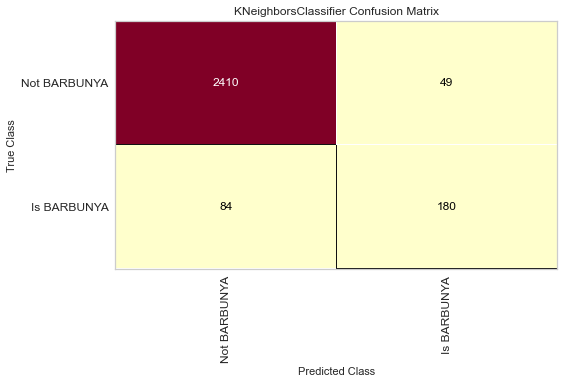

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [145]:
# Erste klasse immer True und zweite Klasse False

from yellowbrick.classifier import ConfusionMatrix

confusion_matrix = ConfusionMatrix(
    model,
    classes=['Not BARBUNYA','Is BARBUNYA']
)
confusion_matrix.score(X_test, y_test)
confusion_matrix.show()

Accuracy

In [146]:
tp = 180
tn = 2410
fp = 49
fn = 84

In [147]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.9511568123393316

In [148]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predicted_test)

0.9511568123393316

Recall

In [149]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predicted_test)

0.6818181818181818

In [150]:
recall = tp/(tp+fn)
recall

0.6818181818181818

Precision

In [151]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predicted_test)

0.7860262008733624

In [152]:
precision = tp/(tp+fp)
print(precision)

0.7860262008733624


In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted_test))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2459
        True       0.79      0.68      0.73       264

    accuracy                           0.95      2723
   macro avg       0.88      0.83      0.85      2723
weighted avg       0.95      0.95      0.95      2723



In [154]:
f1 = 2*precision*recall/(precision+recall)
f1

0.7302231237322515

In [155]:
from sklearn.metrics import f1_score

f1_score(y_test,y_predicted_test)

0.7302231237322515

# Entscheidungsbaummodelle

Gini impurity bestraft falsch klassifizierte Zeilen stärker als accuracy
Kriterium finden, dass die Daten amgenauesten splittet in rechts rot links grün oder rockts falsch links wahr. Dafür ist die Gini impurity

In [156]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

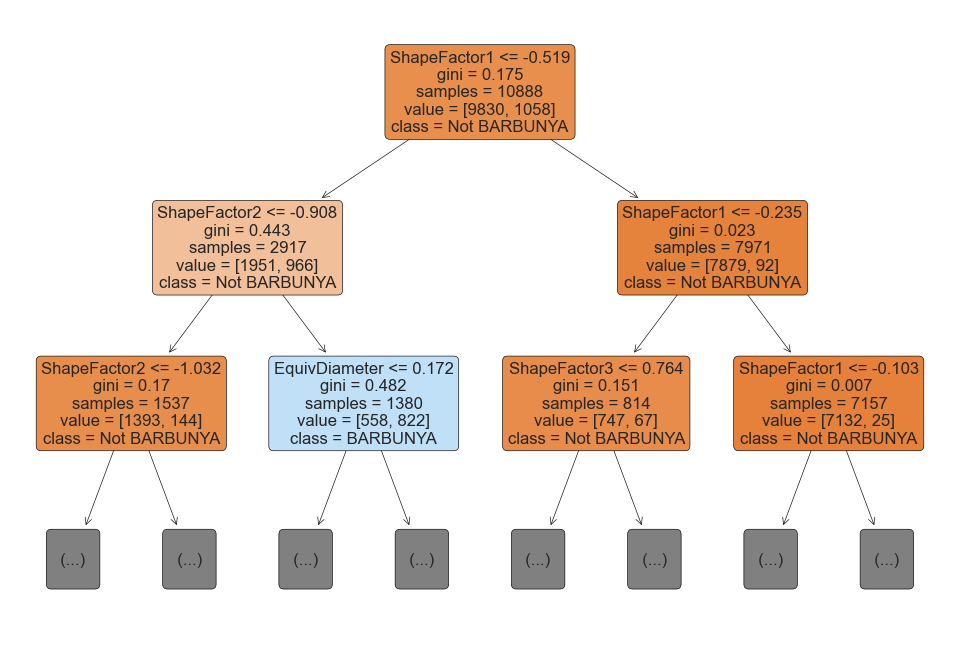

In [157]:
# Plotte die ersten Ebenen des Entscheidungsbaummmodells
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(dpi=150)
plot_tree(model_dt,
          max_depth=2,
          feature_names=data.columns,
          class_names=['Not BARBUNYA','BARBUNYA'],
          rounded=True,
          filled=True,
          fontsize=8);

In [158]:
data.columns

Index(['EquivDiameter', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3'], dtype='object')

In [159]:
y_predicted_test_dt = model_dt.predict(X_test)
print(classification_report(y_test,y_predicted_test_dt))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96      2459
        True       0.65      0.66      0.66       264

    accuracy                           0.93      2723
   macro avg       0.81      0.81      0.81      2723
weighted avg       0.93      0.93      0.93      2723



# Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=20)
model_rf.fit(X_train, y_train)
y_predicted_test_rf = model_rf.predict(X_test)

In [161]:
print(classification_report(y_test,y_predicted_test_rf))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97      2459
        True       0.78      0.70      0.74       264

    accuracy                           0.95      2723
   macro avg       0.87      0.84      0.86      2723
weighted avg       0.95      0.95      0.95      2723



In [162]:
model_rf.feature_importances_

array([0.23895268, 0.2495993 , 0.30430666, 0.20714136])

In [163]:
pd.Series(model_rf.feature_importances_,index=data.columns)

EquivDiameter    0.238953
ShapeFactor1     0.249599
ShapeFactor2     0.304307
ShapeFactor3     0.207141
dtype: float64

In [164]:
pd.Series(model_rf.feature_importances_,index=data.columns).sort_values(ascending=False)
# Wie oft habe ich nach einem feature gesplittet

ShapeFactor2     0.304307
ShapeFactor1     0.249599
EquivDiameter    0.238953
ShapeFactor3     0.207141
dtype: float64

# Modelle optimieren

In [165]:
from sklearn.model_selection import StratifiedKFold

cv_splitter = StratifiedKFold(shuffle=True, random_state=42)
splits = cv_splitter.split(X, y)
for train_index, test_index in splits:
    print('Zeilen in Training und Testing: ', len(train_index), len(test_index))

Zeilen in Training und Testing:  10888 2723
Zeilen in Training und Testing:  10889 2722
Zeilen in Training und Testing:  10889 2722
Zeilen in Training und Testing:  10889 2722
Zeilen in Training und Testing:  10889 2722


In [166]:
train_index
# Einträge in X die in dem Trainingset drin sind
# In dem letzten Fold waren Zeilen 0, 1, 3, 4, 5, 6, 8...

array([    0,     1,     3, ..., 13608, 13609, 13610])

In [ ]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(max_depth=5, min_samples_split=100,n_estimators=90, min_samples_leaf= 1,random_state=42)
scores = cross_validate(model, X, y,
                        cv=cv_splitter,
                        scoring=['f1', 'precision', 'recall'],
                        return_train_score=True)
scores['test_f1'].mean().round(4)

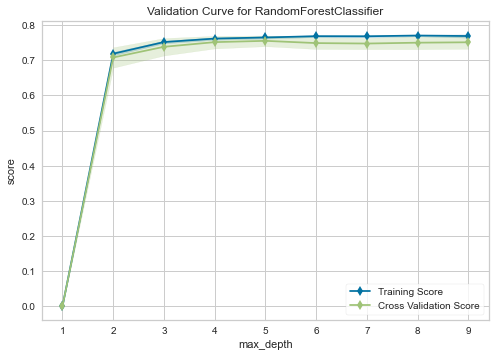

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [238]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    model,
    param_name="max_depth",
    param_range=range(1,10),
# range(1,10) heißt 1-9 x)
    cv=cv_splitter,
    scoring="f1"
)
viz.fit(X, y)
viz.show()